# 1]. IMPORT LIBRARY

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2]. LOAD DATASET

In [5]:
df = pd.read_csv('titanic_cleaned.csv')
df

,Survived,Pclass,Sex,Age,Embarked
0,1,3,female,14.0,C
1,0,3,male,28.5,C
2,0,3,male,22.0,C
3,0,3,male,26.0,C
4,0,3,female,14.5,C
...,...,...,...,...,...
707,1,1,female,48.0,S
708,0,1,male,31.0,S
709,1,1,female,47.0,S
710,0,1,male,33.0,S


## 3]. OVERVIEW OF DATASET

In [27]:
# DATATYPES AND NULL COUNT FOR EACH COLUMNS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   Embarked  712 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 27.9+ KB


In [29]:
# STATISTICAL SUMMARY
df.describe()

,Survived,Pclass,Age
count,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093
std,0.491139,0.836854,14.492933
min,0.000000,1.000000,0.420000
25%,0.000000,1.000000,20.000000
50%,0.000000,2.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [31]:
# COLUMNS IN DATASET
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked'], dtype='object')

In [37]:
# ROWS AND COLUMNS
df.shape

(712, 5)

In [180]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Embarked     object
dtype: object

## 4]. FIND MISSING/NULL VALUES

In [182]:
df.isnull()

,Survived,Pclass,Sex,Age,Embarked
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
707,False,False,False,False,False
708,False,False,False,False,False
709,False,False,False,False,False
710,False,False,False,False,False


In [40]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

## 5]. DATA VISUALIZATION

Text(0.5, 1.0, 'Survival Rate By Gender')

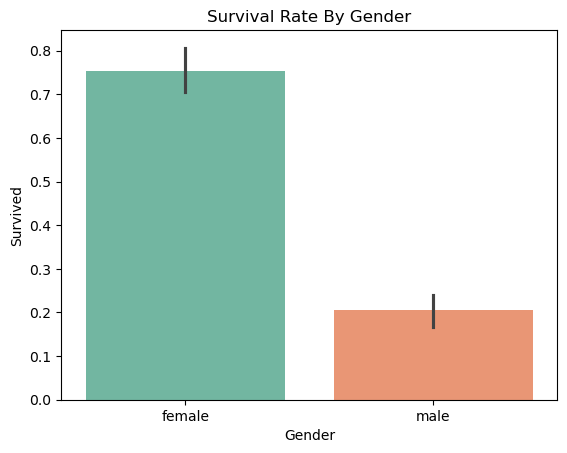

In [151]:
# SURVIVAL BY GENDER

sns.barplot(data=df, x='Sex', y='Survived', palette='Set2')
plt.xlabel('Gender')
plt.title('Survival Rate By Gender')

#### Females had a much higher survival rate (74%) compared to males (18%), supporting the "women and children first" evacuation policy.

## 

Text(0.5, 1.0, 'Survival Rate By Passenger Class')

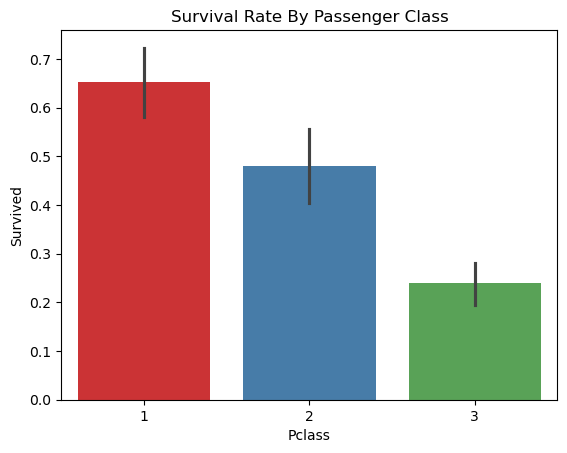

In [157]:
# SURVIVAL BY CLASS

sns.barplot(data=df, x='Pclass', y='Survived', palette='Set1')
plt.title('Survival Rate By Passenger Class')

#### 1st class passengers had the highest survival rate (63%), followed by 2nd (47%), and 3rd (24%).

## 

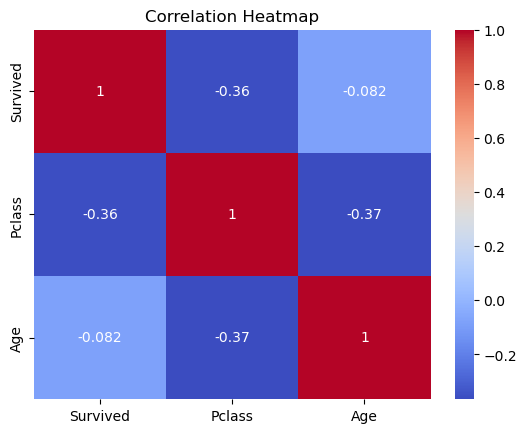

In [164]:
# CORRELATION ANALYSIS

numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### 1. Pclass has a moderate negative correlation with Survived (~-0.34), meaning higher classes had better survival chances.</li>
#### 2. Age has a weak negative correlation with Survived.

##

Text(0.5, 1.0, 'Age Distribution by Class')

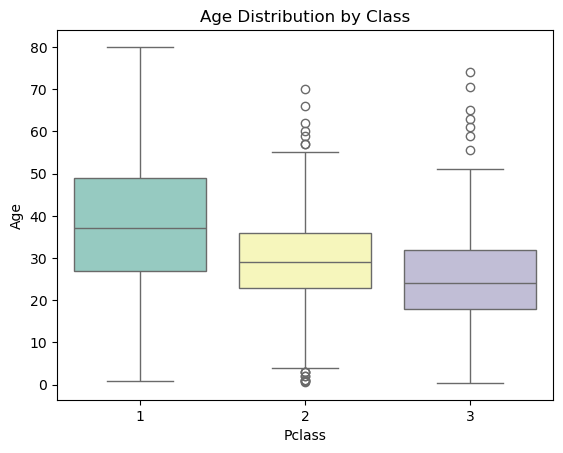

In [172]:
#AGE DISTRIBUTION BY CLASS

sns.boxplot(data=df, x='Pclass', y='Age', palette='Set3')
plt.title("Age Distribution by Class")

#### 1. Median age increases from 3rd class (23 years) to 1st class (37 years).
#### 2. Younger passengers were more common in lower classes.

## 

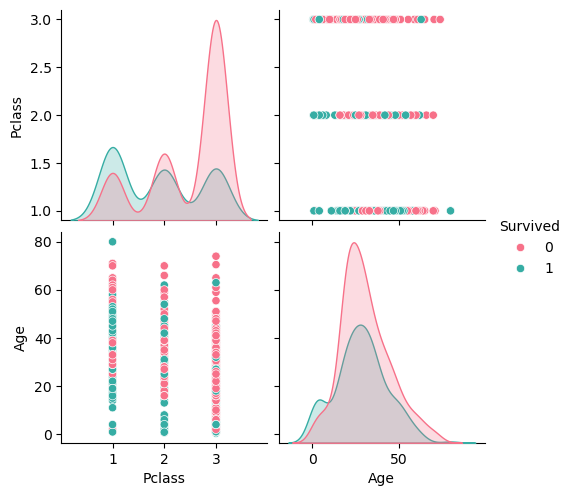

In [174]:
#FEATURE ANALYSIS
sns.pairplot(df[['Survived','Pclass','Age']], hue='Survived', palette='husl')

#### 1. Survivors are concentrated in lower Pclass.
#### 2. Many younger passengers survived, especially in 1st and 2nd class.

## 

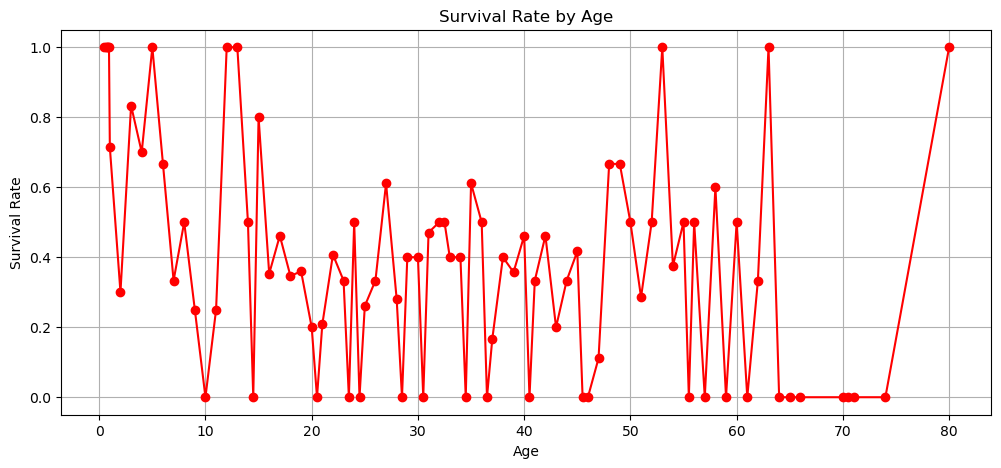

In [145]:
# Survival Rate by Age (Line Chart)
survival_rate_by_age = df.groupby('Age')['Survived'].mean()

plt.figure(figsize=(12,5))
plt.plot(survival_rate_by_age.index, survival_rate_by_age.values, color='red',marker='o')
plt.title("Survival Rate by Age")
plt.xlabel("Age")
plt.ylabel("Survival Rate")
plt.grid(True)
plt.show()

#### Very young passengers (children under 10) had a higher survival rate, which decreases in middle age, then slightly fluctuates in older ages.